# Assignment 2 (90 marks)

## *The adverse health effects of air pollution - are we making any progress?*

<p><img src=files/air.jpg width="900"></p>
<p><strong>Credit:</strong>  <a href="https://www.flickr.com/people/44221799@N08/">Flickr/E4C</a> </p>

In [1]:
# Load relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import warnings

warnings.filterwarnings("ignore")  # Suppress all warnings

<h2>Introduction</h2>
<p><strong>Business Context.</strong> Air pollution is a very serious issue that the global population is currently dealing with. The abundance of air pollutants is not only contributing to global warming, but it is also causing problematic health issues to the population. There have been numerous efforts to protect and improve air quality across most nations. However, it seems that we are making very little progress. One of the main causes of this is the fact that the majority of air pollutants are derived from the burning of fossil fuels such as <em>coal</em>. Big industries and several other economical and political factors have slowed the progress towards the use of renewable energy by promoting the use of fossil fuels. Nevertheless, if we educate the general population and create awareness of this issue, we will be able to overcome this problem in the future.      </p>
<p>For this case, you have been hired as a data science consultant for an important environmental organization. In order to promote awareness of environmental and greenhouse gas issues, your client is interested in a study of <strong>plausible impacts of air contamination on the health of the global population</strong>. They have gathered some <em>raw</em> data provided by the <a href="https://www.who.int/">World Health Organization</a>, <a href="http://www.healthdata.org/">The Institute for Health Metrics and Evaluation</a> and the <a href="https://www.worldbank.org/">World Bank Group</a>. Your task is to conduct data analysis, search for potential information, and create visualizations that the client can use for their campaigns and grant applications. </p>
<p><strong>Analytical Context.</strong> You are given a folder, named <code>files</code> with <em>raw</em> data. This data contains quite a large number of variables and it is in a fairly disorganized state. In addition, one of the datasets contains very poor documentation, segmented into several datasets. Your objective will be to:</p>
<ol>
<li>Extract and clean the relevant data. You will have to manipulate several datasets to obtain useful information for the case. </li>
<li>Conduct Exploratory Data Analysis. You will have to create meaningful plots, formulate meaningful hypotheses and study the relationship between various indicators related to air pollution.</li>
</ol>
<p>Additionally, the client has some broad questions they would like to answer:<br />
1. Are we making any progress in reducing the amount of emitted pollutants across the globe?<br />
2. Which are the critical regions where we should start environmental campaigns?<br />
3. Are we making any progress in the prevention of deaths related to air pollution?<br />
4. Which demographic characteristics seem to correlate with the number of health-related issues derived from air pollution? </p>

<h2>Extracting and cleaning relevant data</h2>
<p>Let's take a look at the data provided by the client in the <code>files</code> folder. There, we see another folder  named <code>WDI_csv</code> with several CSV files corresponding to the World Bank's primary <a href="https://datacatalog.worldbank.org/dataset/world-development-indicators">World Development Indicators</a>. The client stated that this data may contain some useful information relevant to our study, but they have not told us anything aside from that. Thus, we are on our own in finding and extracting the relevant data for our study. This we will do next. </p>
<p>Let's take a peek at the file <code>WDIData.csv</code>:</p>

In [2]:
WDI_data = pd.read_csv("./files/WDI_csv/WDIData.csv")
print(WDI_data.columns)
print(WDI_data.info())
WDI_data.head()

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', 'Unnamed: 64'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377256 entries, 0 to 377255
Data columns (total 65 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    377256 non-null  object 
 1   Country Code    377256 non-null  object 
 2   Indicator Name  377256 non-null  object 
 3   Indicator Co

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,82.783289,83.120303,83.533457,83.897596,84.171599,84.510171,NaN,NaN,NaN,NaN
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,86.428272,87.070576,88.176836,87.342739,89.130121,89.678685,90.273687,NaN,NaN,NaN
4,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,73.942103,75.244104,77.162305,75.538976,78.741152,79.665635,80.749293,NaN,NaN,NaN


<p>The data seems to have a large number of indicators dating from 1960. There are also columns containing country names and codes. Notice that the first couple of rows say <code>Arab World</code>, which may indicate that the data contains broad regional data as well. We notice also that there are at least 100,000 entries with <code>NaN</code> values for each year column.</p>
<p>Since we are interested in environmental indicators, we must get rid of any rows not relevant to our study. However, the number of indicators seems to be quite large and a manual inspection seems impossible. Let's load the file <code>WDISeries.csv</code> which seems to contain more information about the indicators:</p>

In [3]:
WDI_ids = pd.read_csv("./files/WDI_csv/WDISeries.csv")
print(WDI_ids.columns)
WDI_ids.head()

Index(['Series Code', 'Topic', 'Indicator Name', 'Short definition',
       'Long definition', 'Unit of measure', 'Periodicity', 'Base Period',
       'Other notes', 'Aggregation method', 'Limitations and exceptions',
       'Notes from original source', 'General comments', 'Source',
       'Statistical concept and methodology', 'Development relevance',
       'Related source links', 'Other web links', 'Related indicators',
       'License Type', 'Unnamed: 20'],
      dtype='object')


,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,AG.AGR.TRAC.NO,Environment: Agricultural production,"Agricultural machinery, tractors",NaN,Agricultural machinery refers to the number of...,NaN,Annual,NaN,NaN,Sum,...,NaN,NaN,"Food and Agriculture Organization, electronic ...",A tractor provides the power and traction to m...,Agricultural land covers more than one-third o...,NaN,NaN,NaN,CC BY-4.0,NaN
1,AG.CON.FERT.PT.ZS,Environment: Agricultural production,Fertilizer consumption (% of fertilizer produc...,NaN,Fertilizer consumption measures the quantity o...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,NaN,"Food and Agriculture Organization, electronic ...",Fertilizer consumption measures the quantity o...,"Factors such as the green revolution, has led ...",NaN,NaN,NaN,CC BY-4.0,NaN
2,AG.CON.FERT.ZS,Environment: Agricultural production,Fertilizer consumption (kilograms per hectare ...,NaN,Fertilizer consumption measures the quantity o...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,NaN,"Food and Agriculture Organization, electronic ...",Fertilizer consumption measures the quantity o...,"Factors such as the green revolution, has led ...",NaN,NaN,NaN,CC BY-4.0,NaN
3,AG.LND.AGRI.K2,Environment: Land use,Agricultural land (sq. km),NaN,Agricultural land refers to the share of land ...,NaN,Annual,NaN,NaN,Sum,...,NaN,NaN,"Food and Agriculture Organization, electronic ...",Agricultural land constitutes only a part of a...,Agricultural land covers more than one-third o...,NaN,NaN,NaN,CC BY-4.0,NaN
4,AG.LND.AGRI.ZS,Environment: Land use,Agricultural land (% of land area),NaN,Agricultural land refers to the share of land ...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,NaN,"Food and Agriculture Organization, electronic ...",Agriculture is still a major sector in many ec...,Agricultural land covers more than one-third o...,NaN,NaN,NaN,CC BY-4.0,NaN


<p>Bingo! The <code>WDI_ids</code> DataFrame contains a column named <code>Topic</code>. Moreover, it seems that <em>Environment</em> is listed as a key topic in the column.</p>

<h3>Exercise 1 (4 marks):</h3>
<p>Extract all the rows that have the topic key <em>Environment</em> in <code>WDI_ids</code>. Add to the resulting DataFrame a new column named <code>Subtopic</code> which contains the corresponding subtopic of the indicator. For example, the subtopic of <code>Environment: Agricultural production</code> is <code>Agricultural production</code>. Which subtopics do you think are of interest to us?</p>
<p><strong>Hint:</strong> Remember that you can apply string methods to Series using the <code>str()</code> method of <code>pandas</code>. </p>

**Answer.**

In [4]:
environment_df = WDI_ids[WDI_ids['Topic'].str.contains('Environment', na=False)]
environment_df['Subtopic'] = environment_df['Topic'].str.split(':').str[1].str.strip()

print(environment_df[['Topic', 'Subtopic']])


interest_subtopics = environment_df['Subtopic'].unique()
print("\nSubtopics of interest related to environment:")
print(interest_subtopics)



                                     Topic                 Subtopic
0     Environment: Agricultural production  Agricultural production
1     Environment: Agricultural production  Agricultural production
2     Environment: Agricultural production  Agricultural production
3                    Environment: Land use                 Land use
4                    Environment: Land use                 Land use
...                                    ...                      ...
1322   Environment: Density & urbanization   Density & urbanization
1323   Environment: Density & urbanization   Density & urbanization
1324   Environment: Density & urbanization   Density & urbanization
1325   Environment: Density & urbanization   Density & urbanization
1326   Environment: Density & urbanization   Density & urbanization

[138 rows x 2 columns]

Subtopics of interest related to environment:
['Agricultural production' 'Land use' 'Energy production & use'
 'Emissions' 'Biodiversity & protected areas' 'De

-------

<h3>Exercise 2 (4 marks):</h3>
<p>Use the results of Exercise 1 to create a new DataFrame with the history of all emissions indicators for countries and major regions. Call this new DataFrame <code>Emissions_df</code>. How many emissions indicators are in the study?</p>

**Answer.**

In [5]:

wdi_series_df = pd.read_csv("./files/WDI_csv/WDISeries.csv")

emissions_df = wdi_series_df[wdi_series_df['Topic'].str.contains('Emissions', case=False, na=False)]

num_emissions = emissions_df.shape[0]
print("Emissions indicators in the study:", num_emissions)



Emissions indicators in the study: 42


-------

<h3>Exercise 3 (4 marks):</h3>
<p>The DataFrame <code>Emissions_df</code> has one column per year of observation. Data in this form is usually referred to as data in <em>wide format</em>, as the number of columns is high. However, it might be easier to query and filter the data if we had a single column containing the year in which each indicator was calculated. This way, <em>each observation will be represented by a single row</em>. Use the <code>pandas</code> function <a href="https://pandas.pydata.org/docs/reference/api/pandas.melt.html"><code>melt()</code></a> to reshape the <code>Emissions_df</code> data into <em>long format</em>. The resulting DataFrame should contain a pair of new columns named <code>Year</code> and <code>Indicator Value</code>:</p>

**Answer.**

In [6]:

path = r'C:\Users\7PSYCHOPATH\Documents\York\Fall\Data Science\Assignment\Assignmnet 2\files\WDI_csv\\'
emissions_df = pd.read_csv(path + 'WDIData.csv')

emissions_long_df = pd.melt(
    emissions_df,
    id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
    var_name='Year',
    value_name='Indicator Value'
)


emissions_long_df.head()


,Country Name,Country Code,Indicator Name,Indicator Code,Year,Indicator Value
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,1960,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,1960,NaN
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,1960,NaN
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,1960,NaN
4,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,1960,NaN


-------

<h3>Exercise 4 (4 marks):</h3>
<p>The column <code>Indicator Value</code> of the new <code>Emissions_df</code> contains a bunch of <code>NaN</code> values. Additionally, the <code>Year</code> column contains an <code>Unnamed: 64</code> value. What procedure should we follow to clean these missing values in our DataFrame? Proceed with your suggested cleaning process.</p>

**Answer.**

In [7]:
emissions_long_df = emissions_long_df.drop(columns=['Unnamed: 64'], errors='ignore')
emissions_long_df = emissions_long_df.dropna(subset=['Indicator Value']).reset_index(drop=True)

emissions_long_df.head()


,Country Name,Country Code,Indicator Name,Indicator Code,Year,Indicator Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,134.772341
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,88.061110
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.591951
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,81.324186
4,Arab World,ARB,Aquaculture production (metric tons),ER.FSH.AQUA.MT,1960,4600.000000


-------

<h3>Exercise 5 (4 marks):</h3>
<p>Split the <code>Emissions_df</code> into two DataFrames, one containing only countries and the other containing only regions. Name these <code>Emissions_C_df</code> and <code>Emissions_R_df</code> respectively.</p>
<p><strong>Hint:</strong> You may want to inspect the file <code>WDICountry.csv</code> for this task. Region country codes may be found by looking at <code>null</code> values of the <code>Region</code> column in <code>WDICountry</code>.</p>

**Answer.**

In [8]:
country_info_df = pd.read_csv(path + 'WDICountry.csv')

region_codes = country_info_df[country_info_df['Region'].isnull()]['Country Code'].tolist()
country_codes = country_info_df[country_info_df['Region'].notnull()]['Country Code'].tolist()

emissions_C_df = emissions_long_df[emissions_long_df['Country Code'].isin(country_codes)]
emissions_R_df = emissions_long_df[emissions_long_df['Country Code'].isin(region_codes)]


In [9]:
print("Emissions_C_df (Countries) sample:")
emissions_C_df.head()

Emissions_C_df (Countries) sample:


,Country Name,Country Code,Indicator Name,Indicator Code,Year,Indicator Value
7166,Afghanistan,AFG,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.452450e+02
7167,Afghanistan,AFG,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.161728e+01
7168,Afghanistan,AFG,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,5.082210e+00
7169,Afghanistan,AFG,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,7.653507e+01
7170,Afghanistan,AFG,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,4.000000e+07


In [10]:
print("Emissions_R_df (Regions) sample:")
emissions_R_df.head()

Emissions_R_df (Regions) sample:


,Country Name,Country Code,Indicator Name,Indicator Code,Year,Indicator Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,134.772341
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,88.061110
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.591951
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,81.324186
4,Arab World,ARB,Aquaculture production (metric tons),ER.FSH.AQUA.MT,1960,4600.000000


-------

<h2>Finalizing the cleaning for our study</h2>
<p>Our data has improved a lot by now. However, since the number of indicators is still quite large, let us focus our study on the following indicators for now:</p>
<ul>
<li>
<p><strong>Total greenhouse gas emissions (kt of CO2 equivalent), EN.ATM.GHGT.KT.CE</strong>: The total of greenhouse emissions includes CO2, Methane, Nitrous oxide, among other pollutant gases. Measured in kilotons.</p>
</li>
<li>
<p><strong>CO2 emissions (kt), EN.ATM.CO2E.KT</strong>: Carbon dioxide emissions are those stemming from the burning of fossil fuels and the manufacture of cement. They include carbon dioxide produced during consumption of solid, liquid, and gas fuels and gas flaring.  </p>
</li>
<li>
<p><strong>Methane emissions (kt of CO2 equivalent), EN.ATM.METH.KT.CE</strong>: Methane emissions are those stemming from human activities such as agriculture and from industrial methane production.</p>
</li>
<li>
<p><strong>Nitrous oxide emissions (kt of CO2 equivalent), EN.ATM.NOXE.KT.CE</strong>: Nitrous oxide emissions are emissions from agricultural biomass burning, industrial activities, and livestock management.</p>
</li>
<li>
<p><strong>Other greenhouse gas emissions, HFC, PFC and SF6 (kt of CO2 equivalent), EN.ATM.GHGO.KT.CE</strong>: Other pollutant gases.</p>
</li>
<li>
<p><strong>PM2.5 air pollution, mean annual exposure (micrograms per cubic meter), EN.ATM.PM25.MC.M3</strong>: Population-weighted exposure to ambient PM2.5 pollution is defined as the average level of exposure of a nation's population to concentrations of suspended particles measuring less than 2.5 microns in aerodynamic diameter, which are capable of penetrating deep into the respiratory tract and causing severe health damage. Exposure is calculated by weighting mean annual concentrations of PM2.5 by population in both urban and rural areas.</p>
</li>
<li>
<p><strong>PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total), EN.ATM.PM25.MC.ZS</strong>: Percent of population exposed to ambient concentrations of PM2.5 that exceed the World Health Organization (WHO) guideline value.</p>
</li>
</ul>

-------

<h3>Exercise 6 (5 marks) :</h3>
<p>For each of the emissions DataFrames, extract the rows corresponding to the above indicators of interest. Replace the long names of the indicators by the short names <code>Total</code>, <code>CO2</code>, <code>CH4</code>, <code>N2O</code>, <code>Other</code>, <code>PM2.5</code>, and <code>PM2.5_WHO</code>. (This will be helpful later when we need to label plots of our data.) </p>

**Answer.**

In [11]:
indicators = {
    "EN.ATM.GHGT.KT.CE": "Total",
    "EN.ATM.CO2E.KT": "CO2",
    "EN.ATM.METH.KT.CE": "CH4",
    "EN.ATM.NOXE.KT.CE": "N2O",
    "EN.ATM.GHGO.KT.CE": "Other",
    "EN.ATM.PM25.MC.M3": "PM2.5",
    "EN.ATM.PM25.MC.ZS": "PM2.5_WHO"
}


new_emissions_C_df = emissions_C_df[emissions_C_df['Indicator Code'].isin(indicators.keys())].copy()
new_emissions_C_df['Indicator Name'] = new_emissions_C_df['Indicator Code'].map(indicators)

new_emissions_R_df = emissions_R_df[emissions_R_df['Indicator Code'].isin(indicators.keys())].copy()
new_emissions_R_df['Indicator Name'] = new_emissions_R_df['Indicator Code'].map(indicators)


In [12]:
print("Filtered Emissions_C_df (Countries):")
new_emissions_C_df.head()

Filtered Emissions_C_df (Countries):


,Country Name,Country Code,Indicator Name,Indicator Code,Year,Indicator Value
7176,Afghanistan,AFG,CO2,EN.ATM.CO2E.KT,1960,414.371
7343,Albania,ALB,CO2,EN.ATM.CO2E.KT,1960,2024.184
7448,Algeria,DZA,CO2,EN.ATM.CO2E.KT,1960,6160.560
7690,Angola,AGO,CO2,EN.ATM.CO2E.KT,1960,550.050
7825,Antigua and Barbuda,ATG,CO2,EN.ATM.CO2E.KT,1960,36.670


In [13]:
print("\nFiltered Emissions_R_df (Regions) sample:")
new_emissions_R_df.head()


Filtered Emissions_R_df (Regions) sample:


,Country Name,Country Code,Indicator Name,Indicator Code,Year,Indicator Value
11,Arab World,ARB,CO2,EN.ATM.CO2E.KT,1960,5.953540e+04
143,Caribbean small states,CSS,CO2,EN.ATM.CO2E.KT,1960,5.878201e+03
275,Central Europe and the Baltics,CEB,CO2,EN.ATM.CO2E.KT,1960,4.665334e+05
404,Early-demographic dividend,EAR,CO2,EN.ATM.CO2E.KT,1960,5.821834e+05
595,East Asia & Pacific,EAS,CO2,EN.ATM.CO2E.KT,1960,1.210072e+06


-------

<h2>Where shall the client start environmental campaigns?</h2>
<p>Now the DataFrames <code>Emissions_C_df</code> and <code>Emissions_R_df</code> seem to be in a good shape. Let's proceed to conduct some exploratory data analysis so that we can make recommendations to our client.</p>

<h3>Exercise 7 (15 marks):</h3>
<p>Let's first calculate some basic information about the main indicators across the globe.</p>
<h4>7.1 (5 marks)</h4>
<p>Compute some basic statistics of the amount of kt of emissions for each of the four main pollutants (<code>CO2, CH4, N2O, Others</code>) over the years. Use the <code>Emissions_C_df</code> data frame. What trends do you see? </p>

**Answer.**

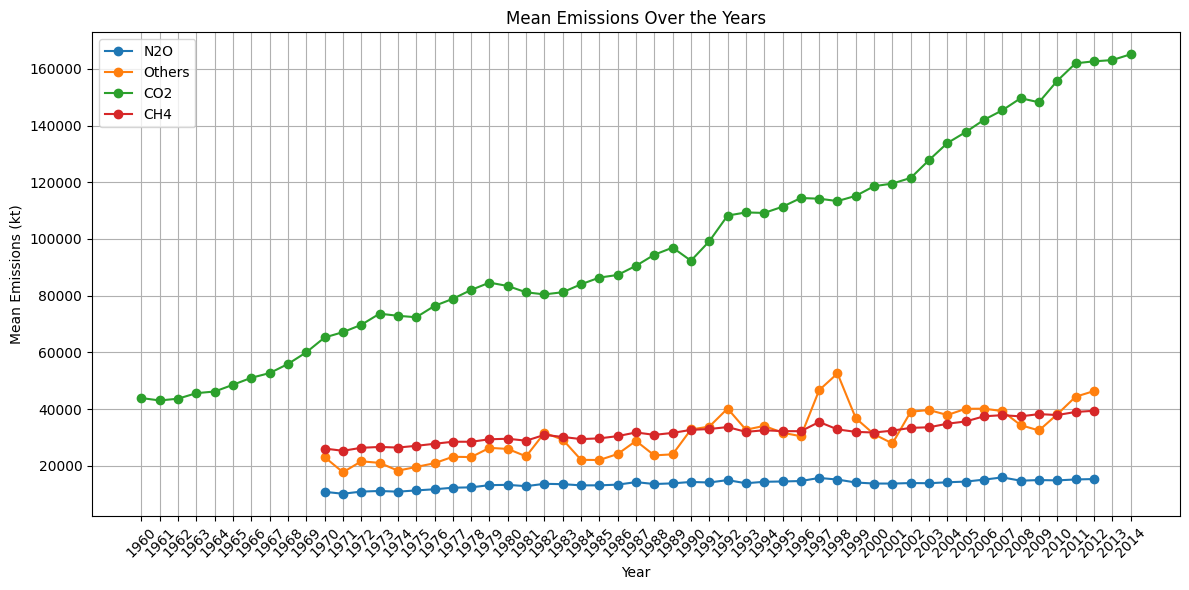

Summary Statistics of Emissions:


,Year,Indicator Name,mean,median,std
0,1960,CO2,43864.241159,997.424000,249106.821991
1,1961,CO2,43016.467250,1067.097000,244197.472658
2,1962,CO2,43651.539390,1140.437000,249912.669011
3,1963,CO2,45599.499871,1213.777000,260004.403691
4,1964,CO2,46178.029919,1243.113000,266111.202103
...,...,...,...,...,...
179,2012,CO2,162632.874078,8830.136000,810994.403809
180,2012,N2O,15300.954568,2816.378533,52100.548100
181,2012,Other,46333.117526,3035.366702,168274.827594
182,2013,CO2,163074.533966,8743.961500,825234.857045


In [14]:
main_pollutants = ['CO2', 'CH4', 'N2O', 'Other']
new_emissions = new_emissions_C_df[new_emissions_C_df['Indicator Name'].isin(main_pollutants)]


stats = new_emissions.groupby(['Year', 'Indicator Name'])['Indicator Value'].agg(['mean', 'median', 'std']).reset_index()


stats_pivot = stats.pivot(index='Year', columns='Indicator Name', values='mean')


plt.figure(figsize=(12, 6))
plt.plot(stats_pivot.index, stats_pivot['N2O'], label='N2O', marker='o')
plt.plot(stats_pivot.index, stats_pivot['Other'], label='Others', marker='o')
plt.plot(stats_pivot.index, stats_pivot['CO2'], label='CO2', marker='o')
plt.plot(stats_pivot.index, stats_pivot['CH4'], label='CH4', marker='o')


plt.title('Mean Emissions Over the Years')
plt.xlabel('Year')
plt.ylabel('Mean Emissions (kt)')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Summary Statistics of Emissions:")
stats



-------

<h4>7.2 (3 marks)</h4>
<p>What can you say about the <em>distribution</em> of emissions around the globe over the years? What information can you extract from the <em>tails</em> of these distributions over the years?</p>

**Answer.**


Distribution Characteristics:

- The shape of the emissions distribution can, for example indicate that the majority of the emissions are highly concentrated among a few countries that would be right skewed or closer to a normal distribution where most countries are spread out equally.

- The outliers, particularly in the upper tail, highlights countries with extreme high emissions, indicating major contributors to global pollution.

Insights from the Tails of the Distribution:

- Upper Tail: Analyzing countries with high emissions can help identify major polluters. This info is crucial for targeting international cooperation and regulatory measures aimed at reducing emissions.

- Lower Tail: Analyzing countries with low emissions can reveal successful strategies for emissions management. These countries might serve as models for best practices in sustainability and emissions reduction.


-------

<h4>7.3 (7 marks)</h4>
<p>Compute a plot showing the behavior of each of the four main air pollutants for each of the main global regions in the <code>Emissions_R_df</code> data frame. The main regions are <code>'Latin America &amp; Caribbean', 'South Asia', 'Sub-Saharan Africa', 'Europe &amp; Central Asia', 'Middle East &amp; North Africa', 'East Asia &amp; Pacific'</code> and <code>'North America'</code>. What conclusions can you make?</p>

**Answer.**

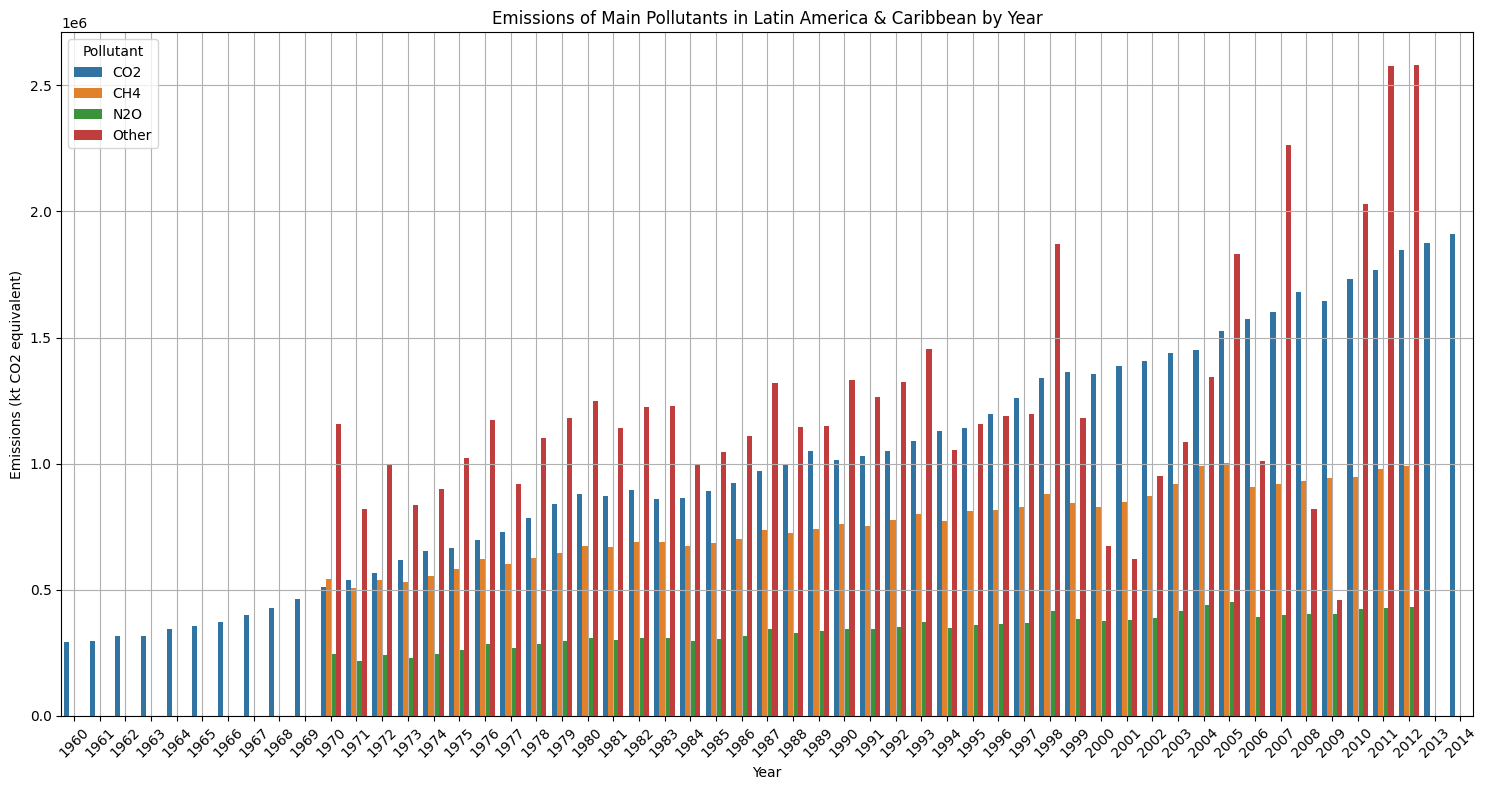

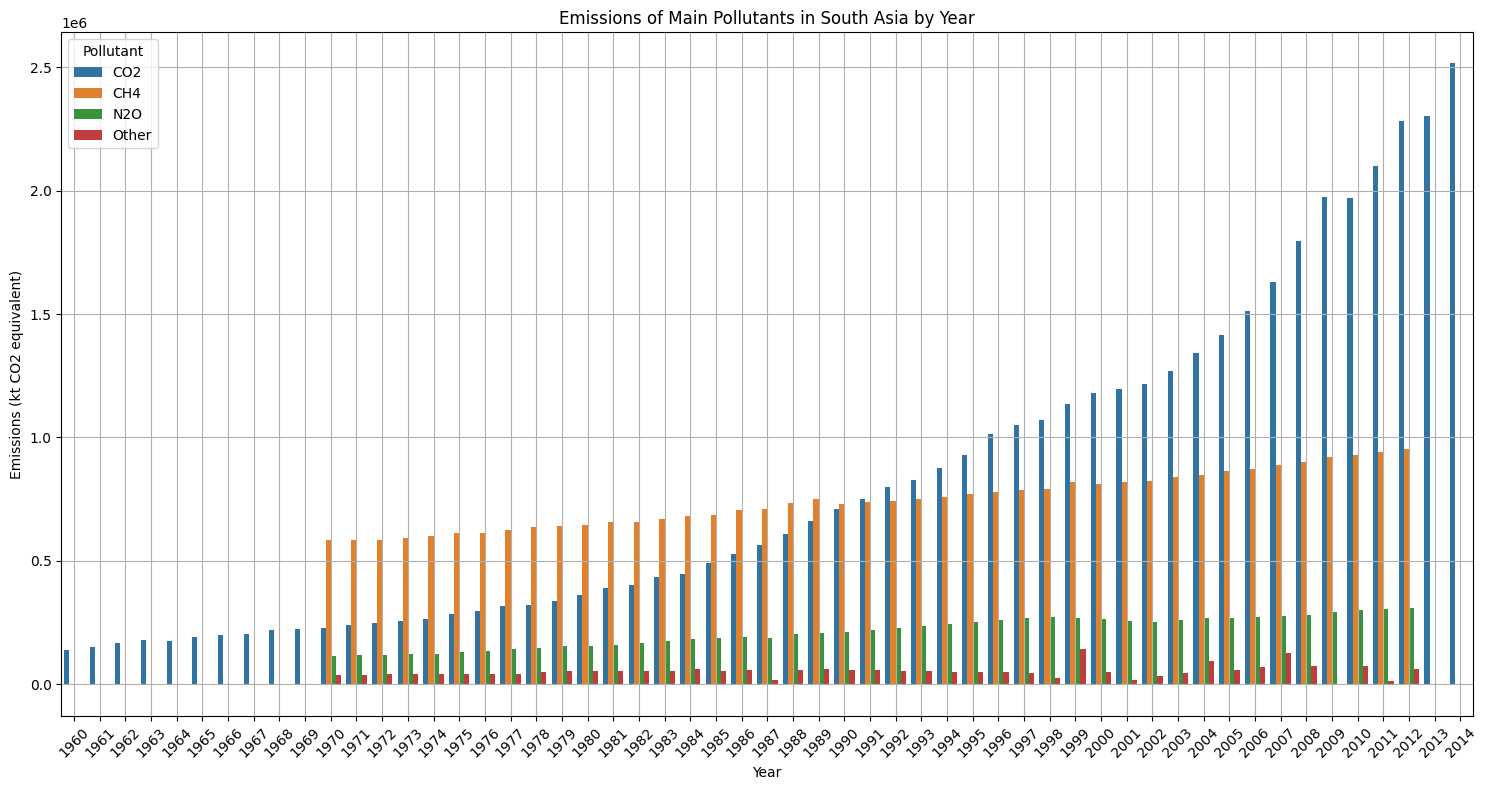

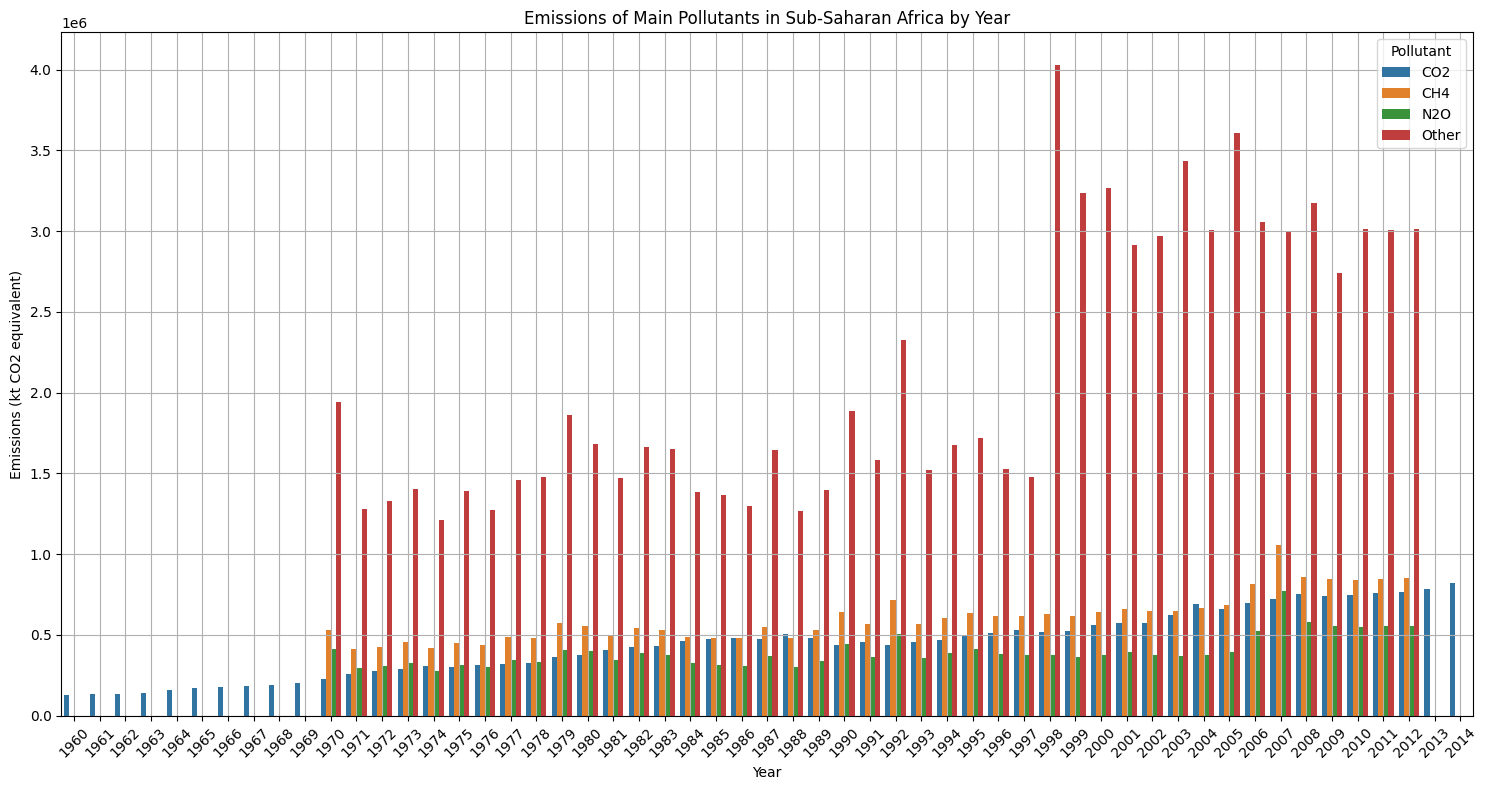

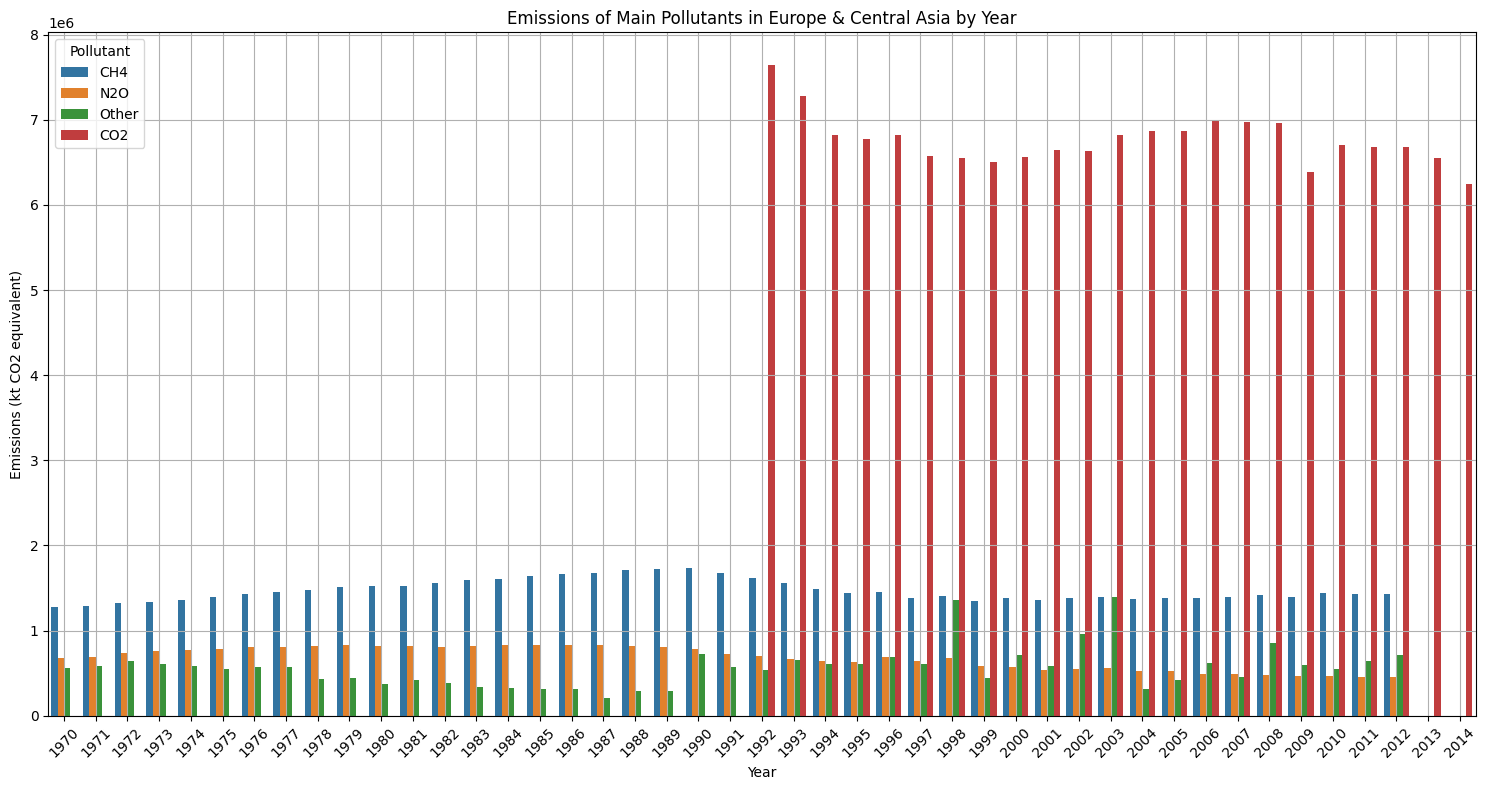

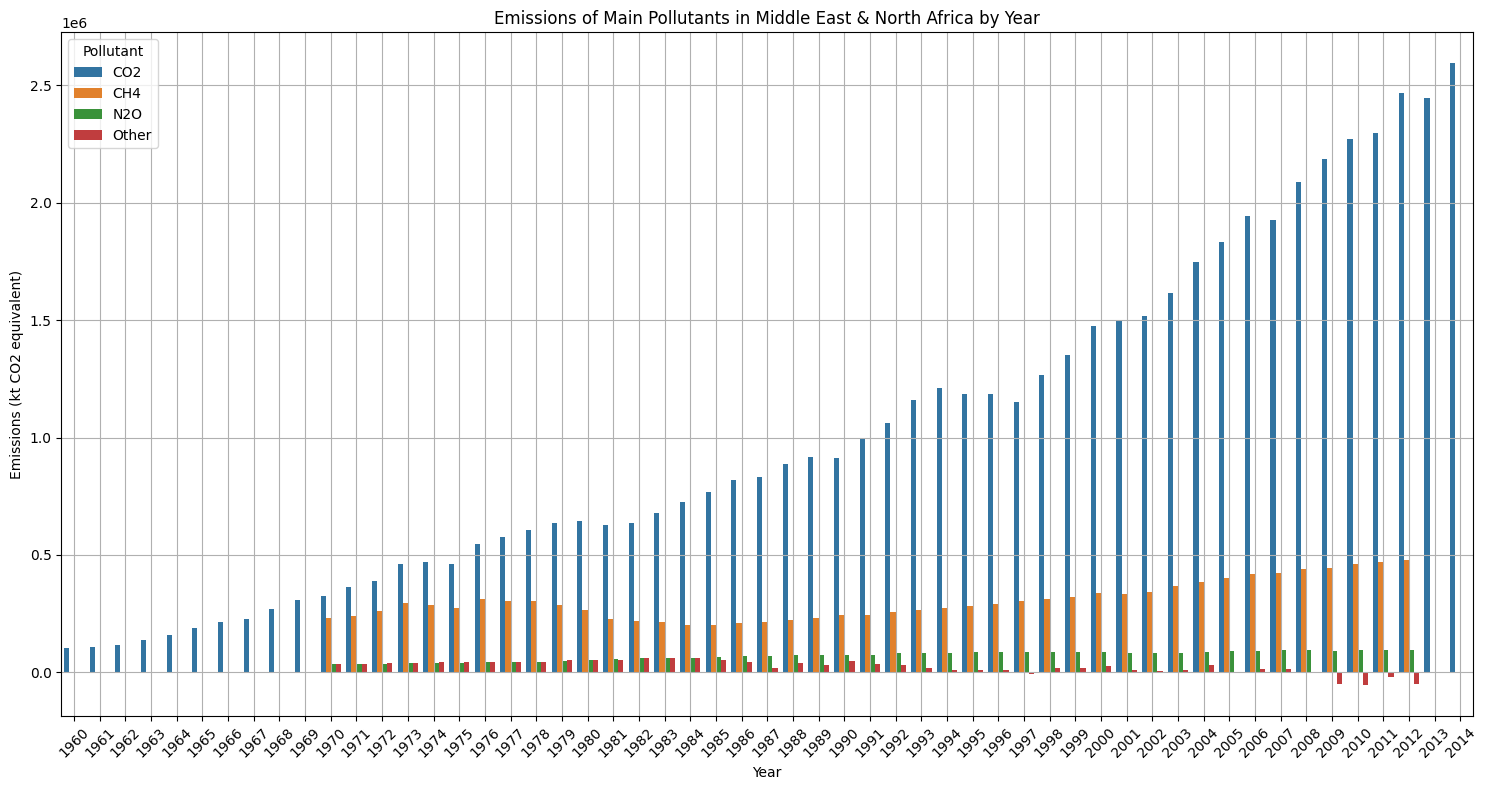

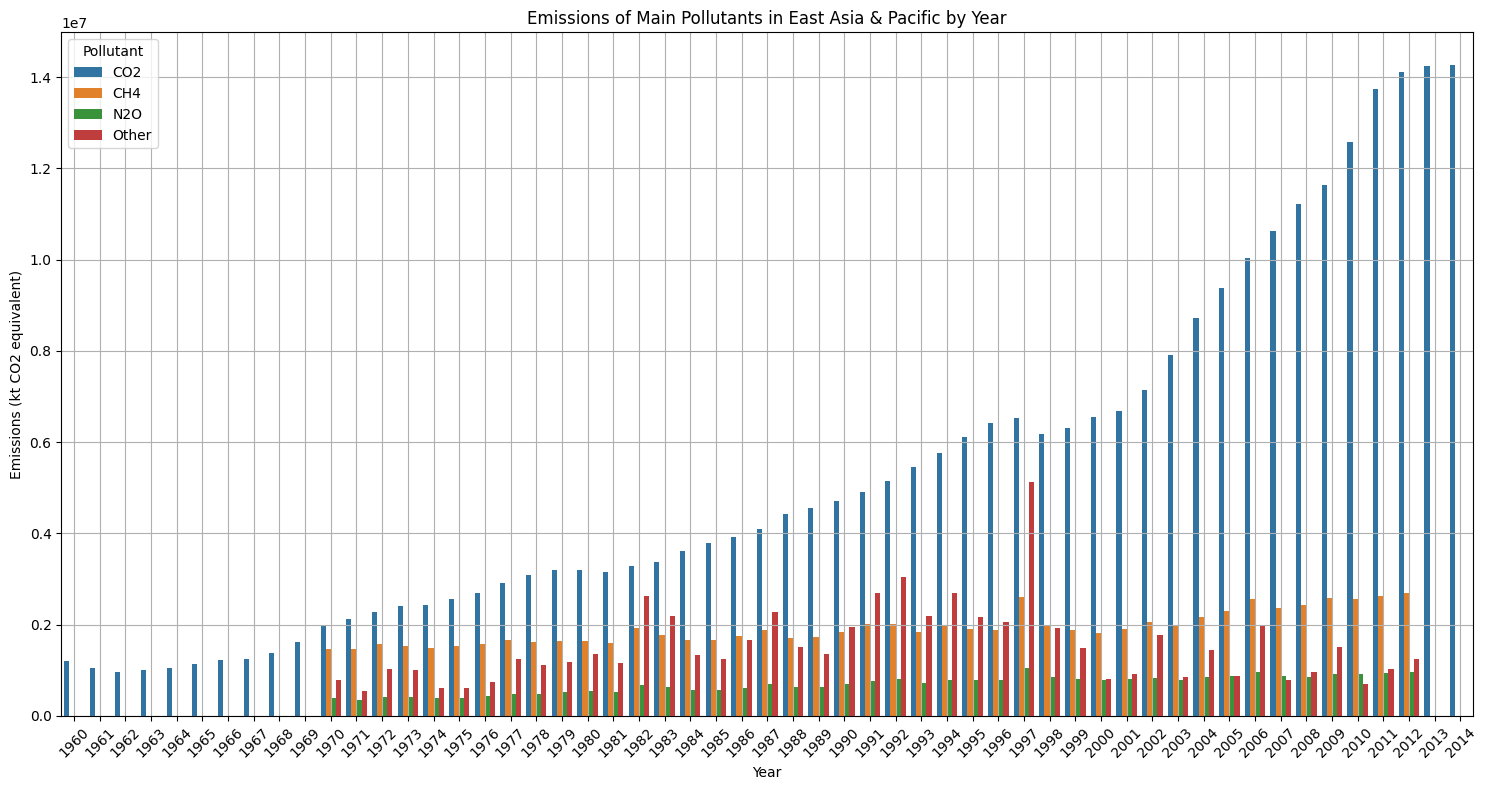

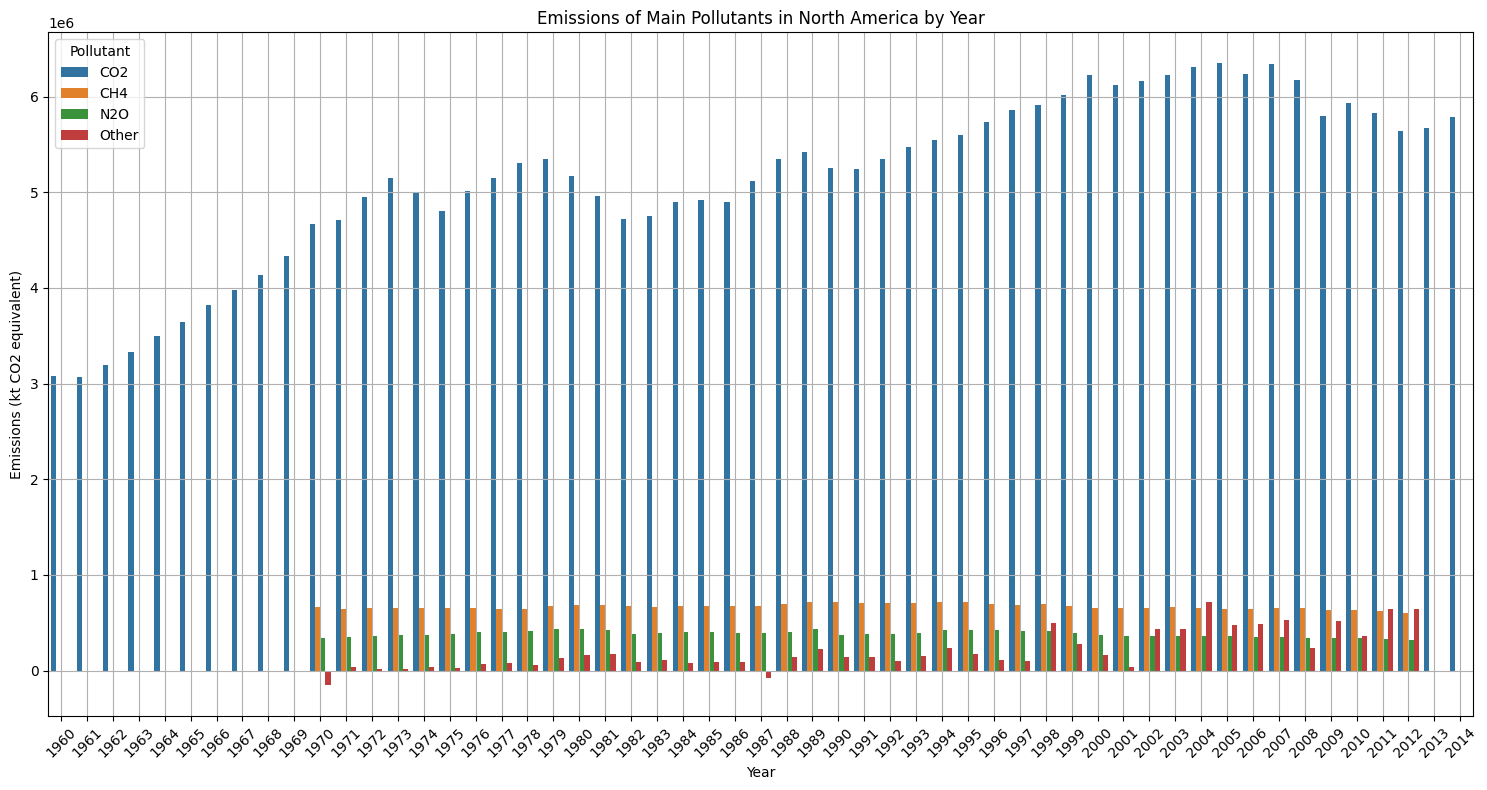

In [15]:
regions_of_interest = [
    'Latin America & Caribbean', 'South Asia', 'Sub-Saharan Africa',
    'Europe & Central Asia', 'Middle East & North Africa',
    'East Asia & Pacific', 'North America'
]

emissions_region_summary = (new_emissions_R_df
    .groupby(['Country Name', 'Country Code', 'Year', 'Indicator Name'])
    .agg({'Indicator Value': 'mean'})
    .reset_index())

emissions_region_summary = emissions_region_summary[
    emissions_region_summary['Country Name'].isin(regions_of_interest) & 
    emissions_region_summary['Indicator Name'].isin(main_pollutants)
]


for region in regions_of_interest:
    region_data = emissions_region_summary[emissions_region_summary['Country Name'] == region]

    plt.figure(figsize=(15, 8))

   
    sns.barplot(
        data=region_data, 
        x='Year', 
        y='Indicator Value', 
        hue='Indicator Name',
        ci=None  
    )

    plt.title(f'Emissions of Main Pollutants in {region} by Year')
    plt.xlabel('Year')
    plt.ylabel('Emissions (kt CO2 equivalent)')
    plt.xticks(rotation=45)  
    plt.legend(title='Pollutant')
    plt.grid(True)
    plt.tight_layout()

    plt.show()


-------

<p>It seems that countries in East Asia and the Pacific are the worst dealing with pollutant emissions. We also see that Europe and Central Asia have been making some efforts to reduce their emissions. Surprisingly this is not the case with North America and Sub-Saharan Africa, which levels have been increasing over the years as well. </p>

<h3>Exercise 8  (10 marks):</h3>
<p>In Exercise 7 we discovered some interesting features of the distribution of the emissions over the years. Let us explore these features in more detail. </p>

<h4>8.1 (5 marks)</h4>
<p>Which are the top five countries that have been in the top 10 of <code>CO2</code> emitters over the years? Have any of these countries made efforts to reduce the amount of CO2 emissions over the last 10 years?</p>

**Answer.**

In [16]:
co2_emissions_df = new_emissions_C_df[new_emissions_C_df['Indicator Name'] == 'CO2']

top_emitters_by_year = (
    co2_emissions_df.groupby('Year')
    .apply(lambda x: x.nlargest(10, 'Indicator Value'))
    .reset_index(drop=True)
)

top_emitters_counts = (
    top_emitters_by_year['Country Name']
    .value_counts()
    .head(5)
    .reset_index()
    .rename(columns={'index': 'Country Name', 'Country Name': 'Countries'})
)


print("Top 5 CO₂ Emitters in the Top 10 List Over the Years:")
top_emitters_counts

Top 5 CO₂ Emitters in the Top 10 List Over the Years:


,Countries,count
0,United States,55
1,China,55
2,Japan,55
3,India,55
4,Canada,54


-------

<h4>8.2  (5 marks)</h4>
<p>Are these five countries carrying out the burden of most of the emissions emitted over the years globally? Can we say that the rest of the world is making some effort to control their polluted gasses emissions over the years?</p>

**Answer.**

- Total CO₂ emissions from top 5 emitters: 1,332,245,651.9875224
- Total CO₂ emissions from other countries: 1,899,471,776.5051668
- The top 5 emitters contribute 41.224076097794764% of the total global emissions.


Burden of Emissions:
While the top 5 emitters take a big chunk, they are not solely responsible for most of the emissions throughout the world. 41.22% is a large share, but the rest of the world contributes the remaining 58.78%.

Efforts by Other Countries:
The emissions from other countries indicate that they are also making significant contributions to global emissions. If emissions from these countries are increasing, it may suggest a lack of sufficient control measures or the rise of industrial activities, especially in developing countries. If emissions from other countries are decreasing, it may suggest efforts to control emissions are beginning to have an impact, although the overall global emissions trend would depend on the specific time periods considered.

This tells that although a significant fraction of the emissions is held by the top emitters, efforts to control the emissions globally need to be undertaken for the whole world. Emissions reduction across all countries is very vital for undertaking the fight against climate change effectively.

-------

<h2>The health impacts of air pollution</h2>

<h3>Exercise 9  (10 marks):</h3>
<p>One of the main contributions of poor health from air pollution is particulate matter. In particular, very small particles (those with a size less than 2.5 micrometres ($\mu$m)) can enter and affect the respiratory system. The <code>PM2.5</code> indicator measures the average level of exposure of a nation's population to concentrations of these small particles. The <code>PM2.5_WHO</code> measures the  percentage of the population who are exposed to ambient concentrations of these particles that exceed some thresholds set by the World Health Organization (WHO). In particular, countries with a higher <code>PM2.5_WHO</code> indicator are more likely to suffer from bad health conditions. </p>
<h4>9.1  (7 marks)</h4>
<p>The client would like to know if there is any relationship between the <code>PM2.5_WHO</code> indicator and the level of income of the general population, as well as how this changes over time. What plot(s) might be helpful to solve the client's question?  What conclusion can you draw from your plot(s) to answer their question?</p>
<p><strong>Hint:</strong> The DataFrame <code>WDI_countries</code> contains a column named <code>Income Group</code>. </p>

**Answer.**

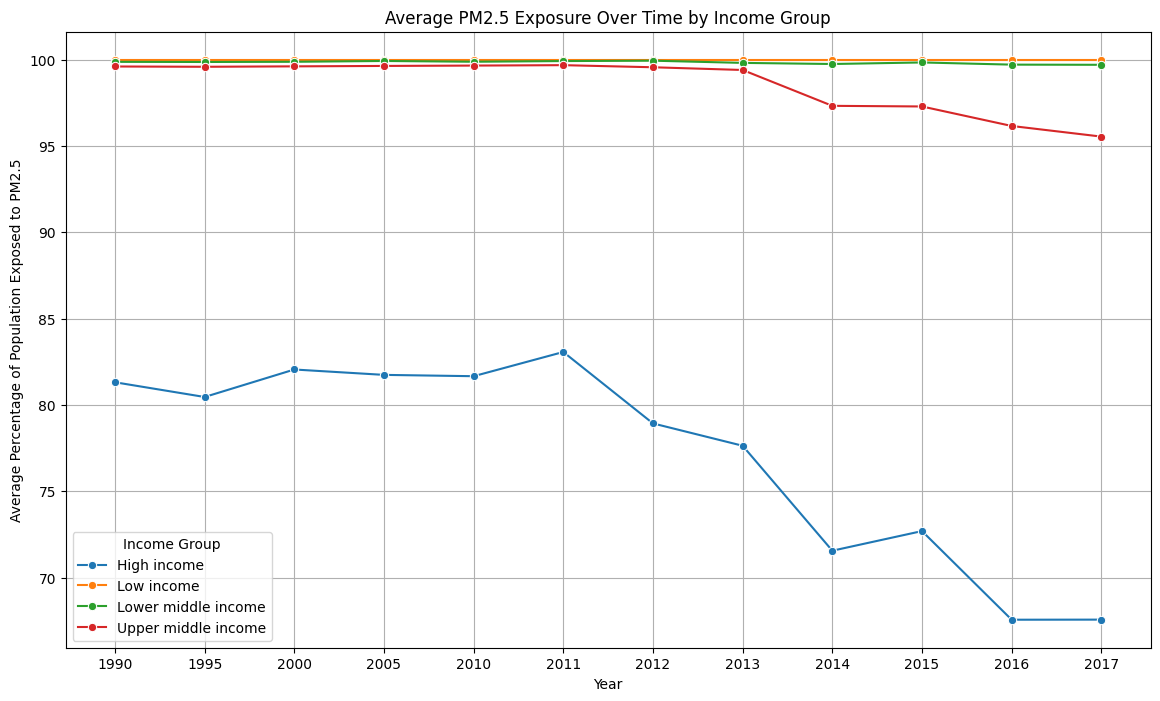

In [17]:
path = r'C:\Users\7PSYCHOPATH\Documents\York\Fall\Data Science\Assignment\Assignmnet 2\files\WDI_csv\\'
WDI_countries = pd.read_csv(path + 'WDICountry.csv')

merged_df = new_emissions_C_df[new_emissions_C_df['Indicator Name'] == 'PM2.5_WHO'].merge(
    WDI_countries, 
    how='left', 
    left_on='Country Code', 
    right_on='Country Code'
)

pm25_who_df = merged_df[merged_df['Indicator Name'] == 'PM2.5_WHO']


pm25_time_df = pm25_who_df.groupby(['Year', 'Income Group'])['Indicator Value'].mean().reset_index()

plt.figure(figsize=(14, 8))
sns.lineplot(data=pm25_time_df, x='Year', y='Indicator Value', hue='Income Group', marker='o')
plt.title('Average PM2.5 Exposure Over Time by Income Group')
plt.xlabel('Year')
plt.ylabel('Average Percentage of Population Exposed to PM2.5')
plt.legend(title='Income Group')
plt.grid()
plt.show()




From the plot, we can observe distinct trends based on income levels:

Generally, high income and upper middle income group see a decrease in PM2.5 exposure over time, particularly noticeable in high-income countries, where exposure dropped significantly after 2011.

In contrast, lower middle income and low income group consistently show close to 100% of the population exposed to PM2.5, with minimal decrease over the years.
This might be an indication that there is some form of relationship between PM2.5 exposure and the various levels of income, where richer countries can substantially reduce exposure more effectively than poorer ones.

-------

<h4>9.2  (3 marks)</h4>
<p>What do you think are the causes behind the results in Exercise 9.1?</p>

- Environmental regulations: High income countries often have stricter environmental regulations and more resources to enforce pollution control measures, which helps reduce PM2.5 exposure.

- Healthcare and awareness: Majority of countries with high incomes are aware of the health effects from air pollution, which is what the public demands and which hence follows into policy action.

- Industrialization and urbanization: Most low and middle income countries are more dependent on industries and urban growth, which are the basic contributors to air pollution without having the respective resources for control and green technologies.

- Investment in clean energy and technology: The more developed a country is, the more access and investment in cleaner sources of energy and technologies that reduce emissions from transportation, industry, and other elements.

**Answer.**

-------

<h3>Exercise 10  (30 marks):</h3>
<p>Finally, our client is interested in investigating the impacts and relationships between <strong>high levels of exposure to particle matter</strong> and <strong>the health of the population</strong>. Coming up with additional data for this task may be infeasible for the client, thus they have asked us to search for relevant health data in the <code>WDIdata.csv</code> file and work with that. </p>

<h4>10.1  (4 marks)</h4>
<p>Which indicators present in the file  <code>WDISeries.csv</code> file might be useful to solve the client's question? Explain.</p>
<p><strong>Note:</strong> Naming one or two indicators is more than enough for this question. </p>

**Answer.**

- Out-of-pocket expenditure (% of current health expenditure) (SH.XPD.OOPC.CH.ZS)
This indicator reflects the financial burden on individuals due to healthcare costs. High levels of particulate matter increase the vulnerability of a population to respiratory and heart diseases, raising overall health care costs to individuals. This indicator allows us to see if increased health costs are linked with increased PM2.5 exposure.

- Domestic private health expenditure (% of current health expenditure) (SH.XPD.PVTD.CH.ZS)
This indicator highlights the private sector's contribution to healthcare spending. A high level of private expenditure may indicate reliance on private health systems,  often seen in countries where public health infrastructure is insufficient to handle pollution-induced health problems. This indicator provides insights into the impact of air pollution on the healthcare system's ability to support the population.

-------

<h4>10.2  (4 marks)</h4>
<p>Use the indicators provided in Exercise 10.1 to give valuable information to the client. </p>

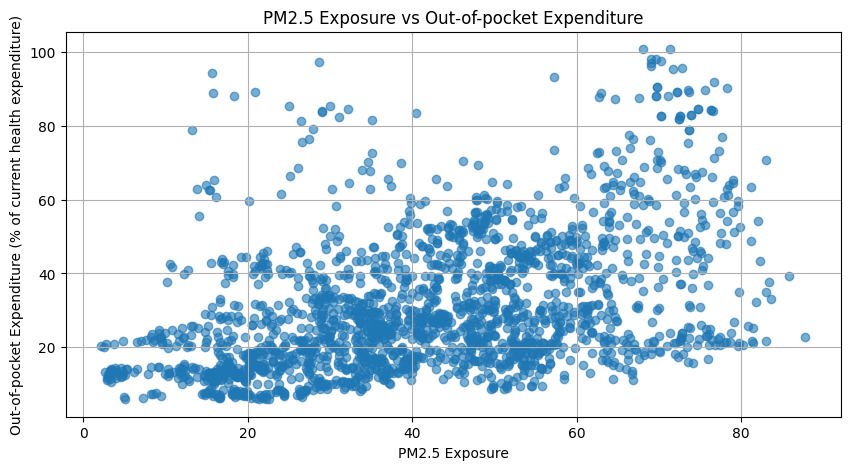

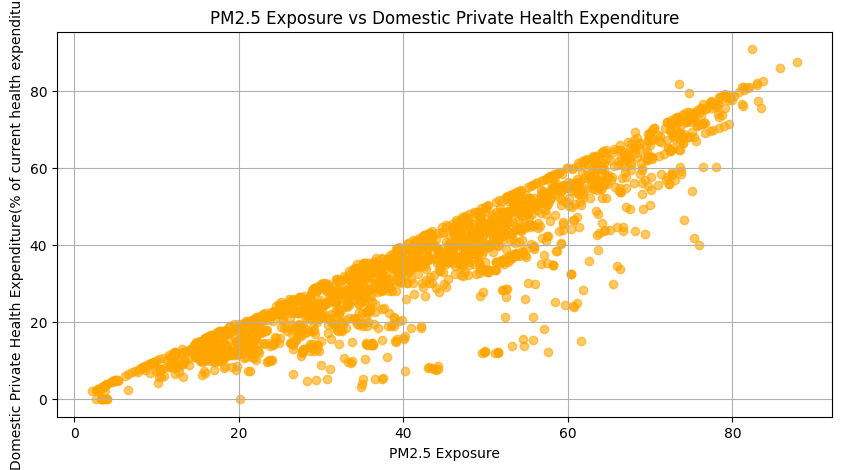

In [18]:

indicators_of_interest = ['SH.XPD.OOPC.CH.ZS', 'SH.XPD.PVTD.CH.ZS', 'EN.ATM.PM25.MC.M3']
filtered_data = emissions_long_df[emissions_long_df['Indicator Code'].isin(indicators_of_interest)]

filtered_data = filtered_data.pivot_table(index=['Country Name', 'Year'], 
                                          columns='Indicator Code', 
                                          values='Indicator Value').reset_index()

filtered_data.columns = ['Country', 'Year', 'Out_of_pocket_expenditure', 
                         'Private_health_expenditure', 'PM2.5_exposure']

filtered_data = filtered_data.dropna()

plt.figure(figsize=(10, 5))
plt.scatter(filtered_data['PM2.5_exposure'], filtered_data['Out_of_pocket_expenditure'], alpha=0.6)
plt.title('PM2.5 Exposure vs Out-of-pocket Expenditure')
plt.xlabel('PM2.5 Exposure')
plt.ylabel('Out-of-pocket Expenditure (% of current health expenditure)')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(filtered_data['PM2.5_exposure'], filtered_data['Private_health_expenditure'], alpha=0.6, color='orange')
plt.title('PM2.5 Exposure vs Domestic Private Health Expenditure')
plt.xlabel('PM2.5 Exposure')
plt.ylabel('Domestic Private Health Expenditure(% of current health expenditure)')
plt.grid(True)
plt.show()


**Answer.**

-------

<h4>10.3  (4 marks)</h4>
<p>Extend the analysis above to find some countries of interest. These are defined as</p>
<ul>
<li>The countries that have a high mortality rate due to household and ambient air pollution, but with low PM2.5 exposure</li>
<li>The countries that have a low mortality rate due to household and ambient air pollution, but with high PM2.5 exposure</li>
</ul>

**Answer.**

In [19]:

indicators_of_interest = ['SH.STA.AIRP.P5', 'SH.STA.AIRP.FE.P5', 'SH.STA.AIRP.MA.P5', 'EN.ATM.PM25.MC.M3']

filtered_data = emissions_long_df[emissions_long_df['Indicator Code'].isin(indicators_of_interest)]

filtered_data = filtered_data.pivot_table(index=['Country Name', 'Year'], 
                                          columns='Indicator Code', 
                                          values='Indicator Value').reset_index()


filtered_data.columns = ['Country', 'Year', 'air_pollution_mortality', 'air_pollution_mortality_female', 
                         'air_pollution_mortality_male', 'PM2.5_Exposure']

filtered_data = filtered_data.dropna()

high_mortality_low_pm25 = filtered_data[(filtered_data['air_pollution_mortality'] > filtered_data['air_pollution_mortality'].quantile(0.5)) & 
                                        (filtered_data['PM2.5_Exposure'] < filtered_data['PM2.5_Exposure'].quantile(0.5))]

low_mortality_high_pm25 = filtered_data[(filtered_data['air_pollution_mortality'] < filtered_data['air_pollution_mortality'].quantile(0.25)) & 
                                        (filtered_data['PM2.5_Exposure'] > filtered_data['PM2.5_Exposure'].quantile(0.75))]


In [20]:
print("Countries with High Mortality from Air Pollution but Low PM2.5 Exposure:")
high_mortality_low_pm25[['Country', 'Year', 'air_pollution_mortality', 'PM2.5_Exposure']].head()

Countries with High Mortality from Air Pollution but Low PM2.5 Exposure:


,Country,Year,air_pollution_mortality,PM2.5_Exposure
34,Algeria,2016,39.853274,49.700000
118,Armenia,2016,32.227168,54.800000
178,Bahrain,2016,69.864182,40.100000
742,El Salvador,2016,24.736486,41.900000
838,Europe & Central Asia (IDA & IBRD countries),2016,23.978778,58.001257


In [21]:
print("Countries with Low Mortality from Air Pollution but High PM2.5 Exposure:")
low_mortality_high_pm25[['Country', 'Year', 'air_pollution_mortality', 'PM2.5_Exposure']]

Countries with Low Mortality from Air Pollution but High PM2.5 Exposure:


,Country,Year,air_pollution_mortality,PM2.5_Exposure
1078,Haiti,2016,15.086483,184.3
2062,Papua New Guinea,2016,12.615056,152.0


-------

<h4>10.4  (10 marks)</h4>
<p>Finally, we want to look at the mortality data by income. We expect higher income countries to have lower pollution-related mortality. Find out if this assumption holds. Calculate summary statistics and histograms for each income category and note any trends.</p>

**Answer.**

                        count       mean        std       min        25%  \
Income Group                                                               
High income           48267.0  29.806281  19.292155  5.893757  15.912737   
Low income           131256.0  29.242704  19.075839  5.893757  15.751286   
Lower-middle income    2345.0  29.702057  18.753354  5.893757  16.328920   
Upper-middle income    2246.0  28.023661  18.324779  5.893757  15.228815   

                           50%        75%        max  
Income Group                                          
High income          23.631267  40.467228  98.054714  
Low income           23.092615  39.853274  98.054714  
Lower-middle income  23.797829  39.772924  98.054714  
Upper-middle income  21.829636  38.447704  98.054714  


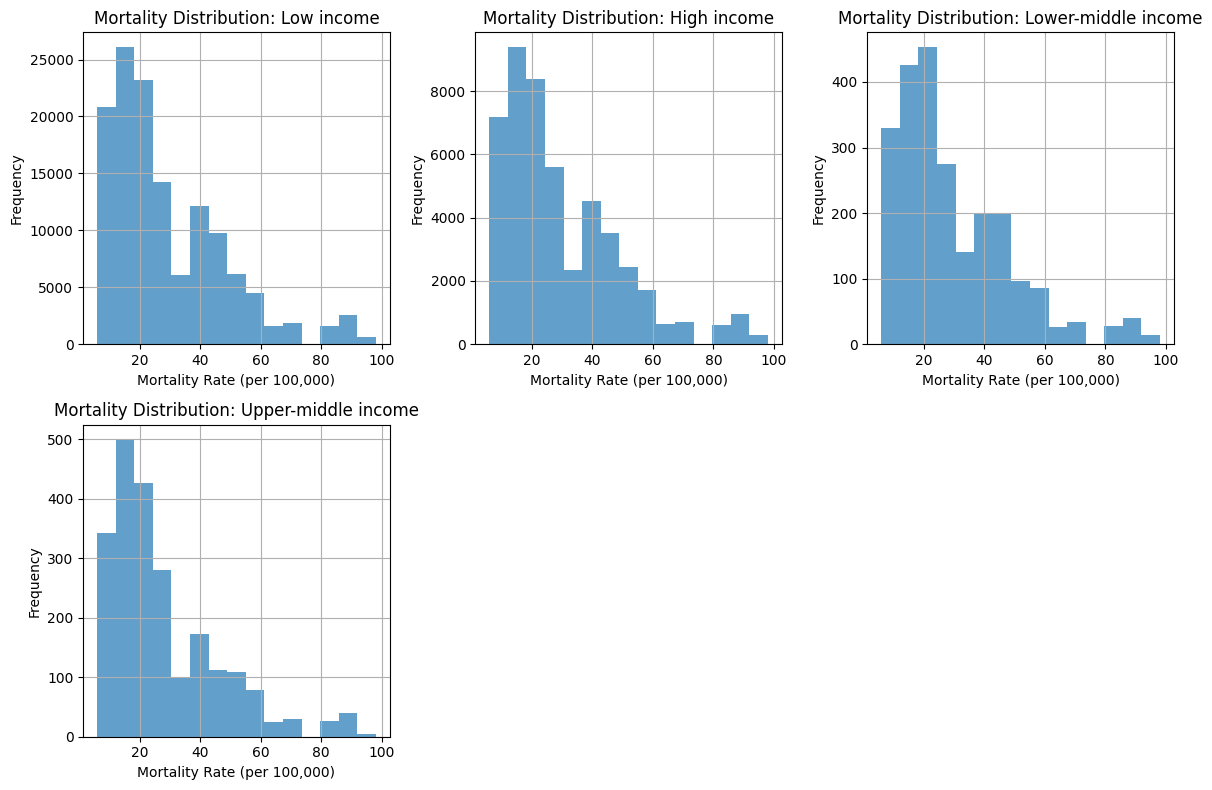

In [22]:
income_data = WDI_data[WDI_data['Indicator Code'] == 'NY.GDP.PCAP.CD']


income_data = WDI_data[WDI_data['Country Name'].str.contains('World|Small states|region|High income', na=False) == False]

income_data_latest = income_data[['Country Name', 'Indicator Code', '2016']]

income_data_latest.columns = ['Country', 'Indicator Code', 'GDP_per_capita_2016']

income_data_latest = income_data_latest.dropna(subset=['GDP_per_capita_2016'])




def classify_income_group(gdp):
    if gdp < 1045:
        return 'Low income'
    elif 1046 <= gdp <= 4095:
        return 'Lower-middle income'
    elif 4096 <= gdp <= 12695:
        return 'Upper-middle income'
    else:
        return 'High income'


income_data_latest['Income Group'] = income_data_latest['GDP_per_capita_2016'].apply(classify_income_group)

filtered_data = filtered_data.merge(income_data_latest[['Country', 'Income Group']], on='Country', how='left')

filtered_data_clean = filtered_data.dropna(subset=['Income Group', 'air_pollution_mortality'])

summary_stats = filtered_data_clean.groupby('Income Group')['air_pollution_mortality'].describe()

print(summary_stats)



income_groups = filtered_data_clean['Income Group'].unique()



plt.figure(figsize=(12, 8))

for i, group in enumerate(income_groups):
    plt.subplot(2, 3, i+1)
    subset = filtered_data_clean[filtered_data_clean['Income Group'] == group]
    plt.hist(subset['air_pollution_mortality'], bins=15, alpha=0.7, label=group)
    plt.title(f'Mortality Distribution: {group}')
    plt.xlabel('Mortality Rate (per 100,000)')
    plt.ylabel('Frequency')
    plt.grid(True) 
plt.tight_layout()
plt.show()



**Mean Mortality Rate:**

- There is no significant difference in the average mortality rate between high-income, low-income, lower-middle income, and upper-middle income countries.


**Spread of Mortality Rates (Standard Deviation):**

- The standard deviation is fairly similar across income groups.
High-income countries have a slightly higher standard deviation compared to the other groups, suggesting a broader spread of mortality rates within high-income countries.


**Minimum and Maximum Mortality Rates:**

- The minimum mortality rate across all income groups is the same , suggesting that some countries across all income groups have very low mortality rates from air pollution.
- The maximum mortality rate is similar across all income groups, meaning that the highest mortality rate is the same in all groups, which could indicate extreme outliers or countries with particularly high pollution-related mortality.


**Quartile Distribution:**

- High-income and low-income countries show very close 25th, 50th, and 75th percentile values, which indicates that their mortality distributions are almost identical in terms of spread.
- Lower-middle income countries have a slightly higher median mortality rate compared to the other groups, suggesting a potential difference in the distribution of mortality within this group.

-------

<h4>10.5  (8 marks)</h4>
<p>At the start, we asked some questions. Based on your analysis, provide a short answer to each of these:</p>
<ol>
<li>Are we making any progress in reducing the amount of emitted pollutants across the globe?</li>
<li>Which are the critical regions where we should start environmental campaigns?</li>
<li>Are we making any progress in the prevention of deaths related to air pollution?</li>
<li>Which demographic characteristics seem to correlate with the number of health-related issues derived from air pollution? </li>
</ol>

**Answer.**

1. Are we making any progress in reducing the amount of emitted pollutants across the globe?
- Yes, progress in reducing emissions particularly in high income countries seems to be perceptible. Indeed, the trends in CO2 emissions and PM2.5 exposure indicate that richer countries have been able to increase environmental controls and cleaner technologies, and thus reduce air pollution over time. However, many low and middle income countries continue to show a high degree of pollution, coupled with extremely reduced capacity for effective emission reduction measures.

2. Which are the critical regions where we should start environmental campaigns?
- Environmental campaigns should focus on low- and middle-income countries, particularly those in Asia, Africa, and parts of South America. Many of these countries still face high levels of PM2.5 exposure and air pollution related deaths. Besides, India, China, and Africa have large populations exposed to harmful pollutants, and engaging these countries will have the most significant global impact on health and climate.

3. Are we making any progress in the prevention of deaths related to air pollution?
- The progress for the goal of averting air pollution deaths is mixed. Due to better air quality and health care systems, the high income countries have shown improvement in reducing mortality rates from household and ambient air pollution. However, many lower income countries, with high levels of industrialization and urbanization, still suffer from high mortality rates, and much scaling up is needed.

4. Which demographic characteristics seem to correlate with the number of health-related issues derived from air pollution?
Income group appears to be the most significant demographic characteristic correlating with health outcomes related to air pollution. Health effects in high-income countries are significantly lower, mainly due to better health care, greater control over environmental regulations and resources, and generally cleaner technologies. However, low income countries tend to indicate higher air pollution related mortality rates due to poor infrastructure, greater industrialization, and fewer resources in efforts to reduce exposure to pollution. Additionally, countries with higher levels of urbanization and industrial activity also tend to show more significant health problems related to air pollution.

-------